# Prodigy Infotech Data Science Internship

## Task 4

Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.



This dataset is used for entity-level sentiment analysis on Twitter, classifying tweets into Positive, Negative, or Neutral categories based on their sentiment toward a given entity. Irrelevant messages are treated as Neutral.

### 1. Required Libraries and Data Loading 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install wordcloud
from wordcloud import WordCloud


                                              0.0/300.2 kB ? eta -:--:--
     ------                                  51.2/300.2 kB 1.3 MB/s eta 0:00:01
     ----------------                       133.1/300.2 kB 2.6 MB/s eta 0:00:01
     -------------------------------------  297.0/300.2 kB 2.6 MB/s eta 0:00:01
     -------------------------------------- 300.2/300.2 kB 1.8 MB/s eta 0:00:00


In [5]:
cols = ['ID', 'Topic', 'Sentiment', 'Text']
df = pd.read_csv(r"twitter_training.csv", names=cols)
df.head()

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


### 2. Basic Data Inspection

In [7]:
df.shape

(74682, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Topic      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [11]:
df.describe(include=object)

,Topic,Sentiment,Text
count,74682,74682,73996
unique,32,4,69491
top,TomClancysRainbowSix,Negative,"At the same time, despite the fact that there ..."
freq,2400,22542,172


In [13]:
# Checking unique values in 'Sentiment'
df['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [14]:
# Checking for missing values
df.isnull().sum()

ID             0
Topic          0
Sentiment      0
Text         686
dtype: int64

In [15]:
# Dropping missing values and duplicates
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [16]:
df.isnull().sum()

ID           0
Topic        0
Sentiment    0
Text         0
dtype: int64

### 3. Visualizing Topic Distribution

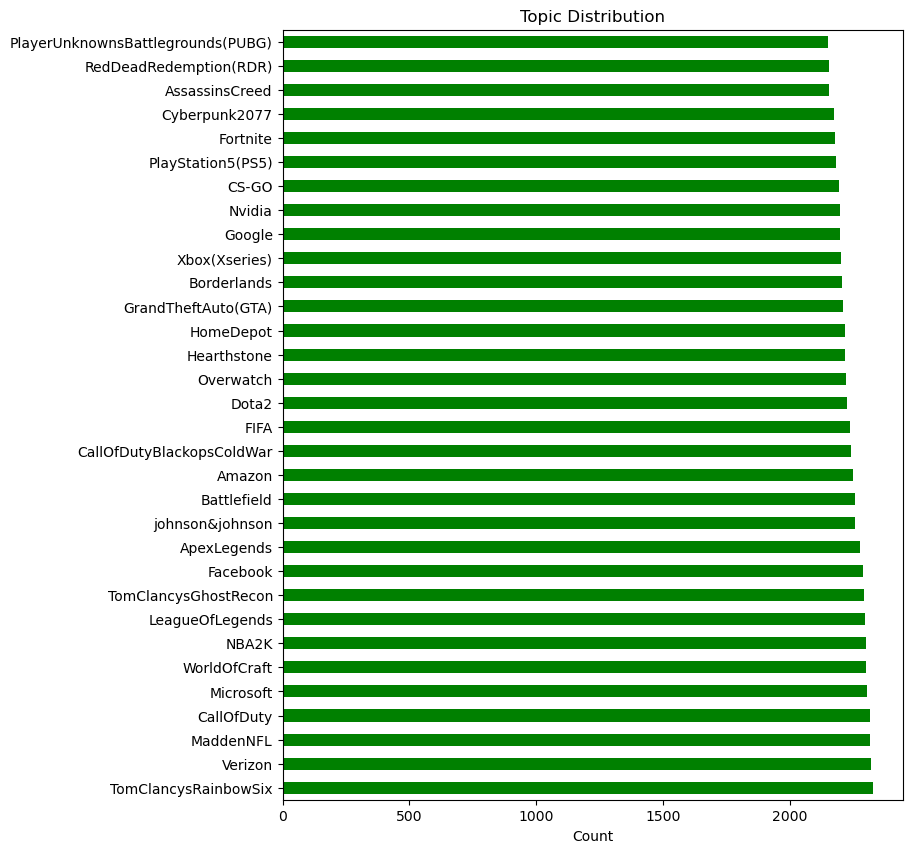

In [17]:
plt.figure(figsize=(8, 10))
df['Topic'].value_counts().plot(kind='barh', color='g')
plt.xlabel("Count")
plt.title("Topic Distribution")
plt.show()


### 4. Visualizing Sentiment Distribution

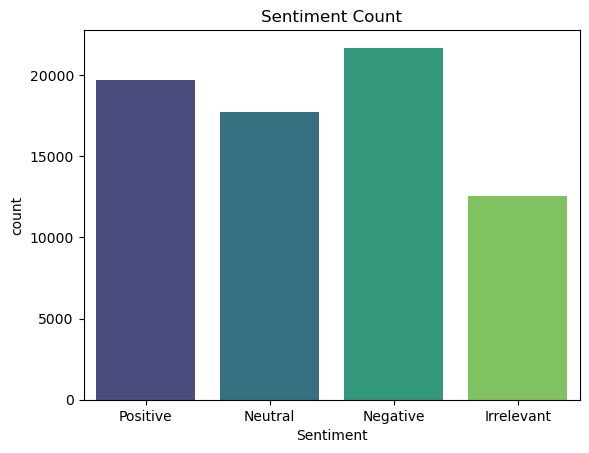

In [19]:
# Sentiment count plot
sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title("Sentiment Count")
plt.show()

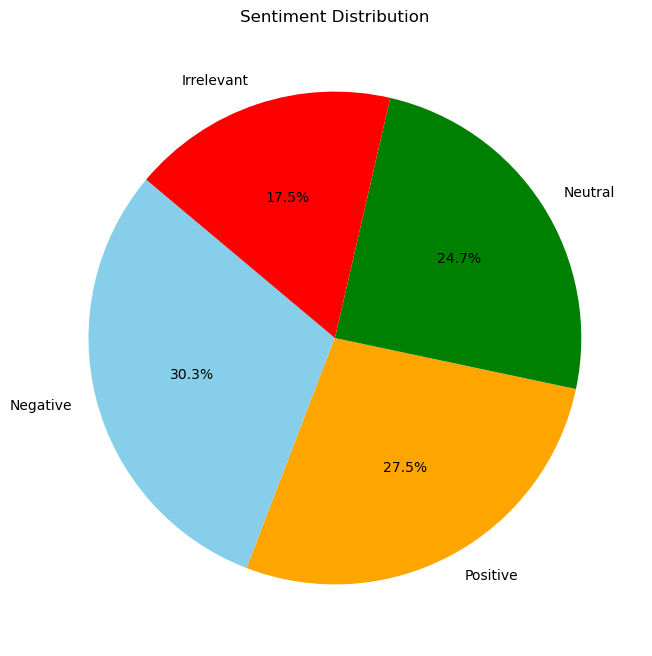

In [20]:
# Pie chart for sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange', 'green', 'red', 'purple'])
plt.title('Sentiment Distribution')
plt.show()

### 5. Topic vs Sentiment Visualization

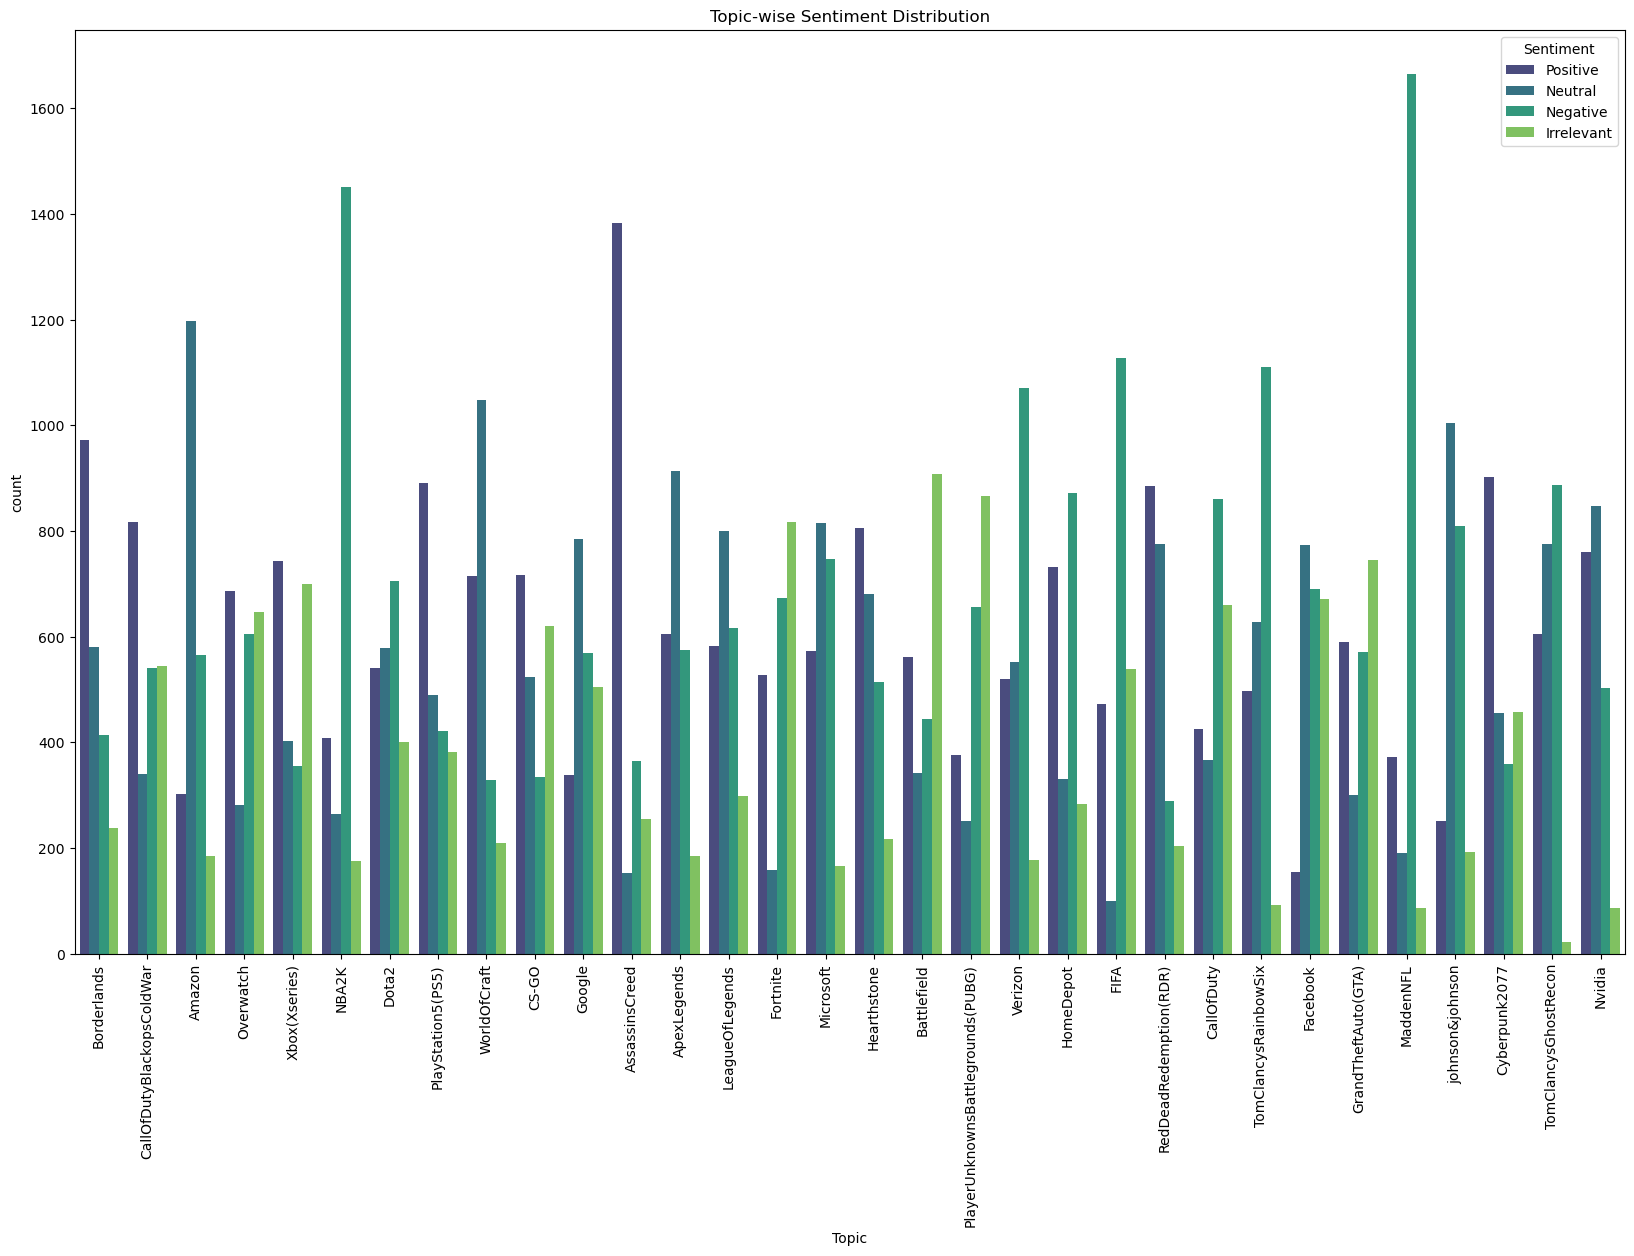

In [21]:
plt.figure(figsize=(20, 12))
sns.countplot(x='Topic', data=df, palette='viridis', hue='Sentiment')
plt.xticks(rotation=90)
plt.title("Topic-wise Sentiment Distribution")
plt.show()

### 6. Top 5 Topics with Sentiments

In [22]:
# Group by Topic and Sentiment
topic_wise_sentiment = df.groupby(["Topic", "Sentiment"]).size().reset_index(name='Count')

In [23]:
# Select Top 5 Topics
top_topics = df['Topic'].value_counts().nlargest(5).index
top_topics_sentiment = topic_wise_sentiment[topic_wise_sentiment['Topic'].isin(top_topics)]

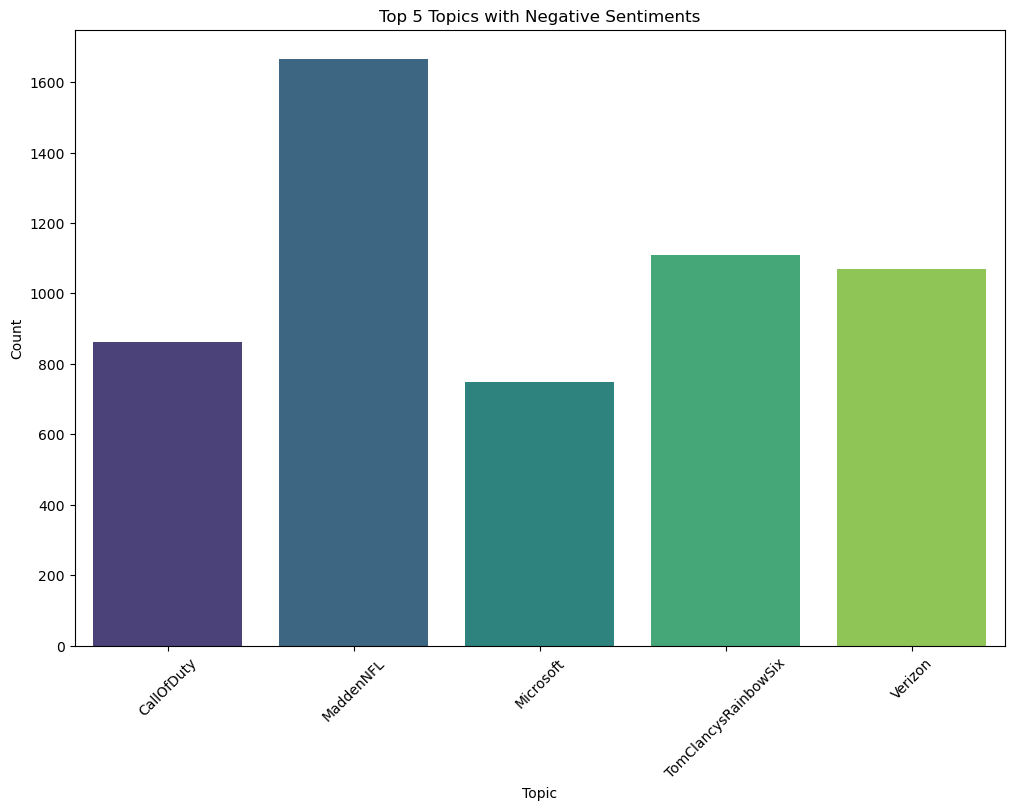

In [24]:
# Visualization for Negative Sentiments
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Negative'], x='Topic', y='Count', palette='viridis')
plt.title('Top 5 Topics with Negative Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

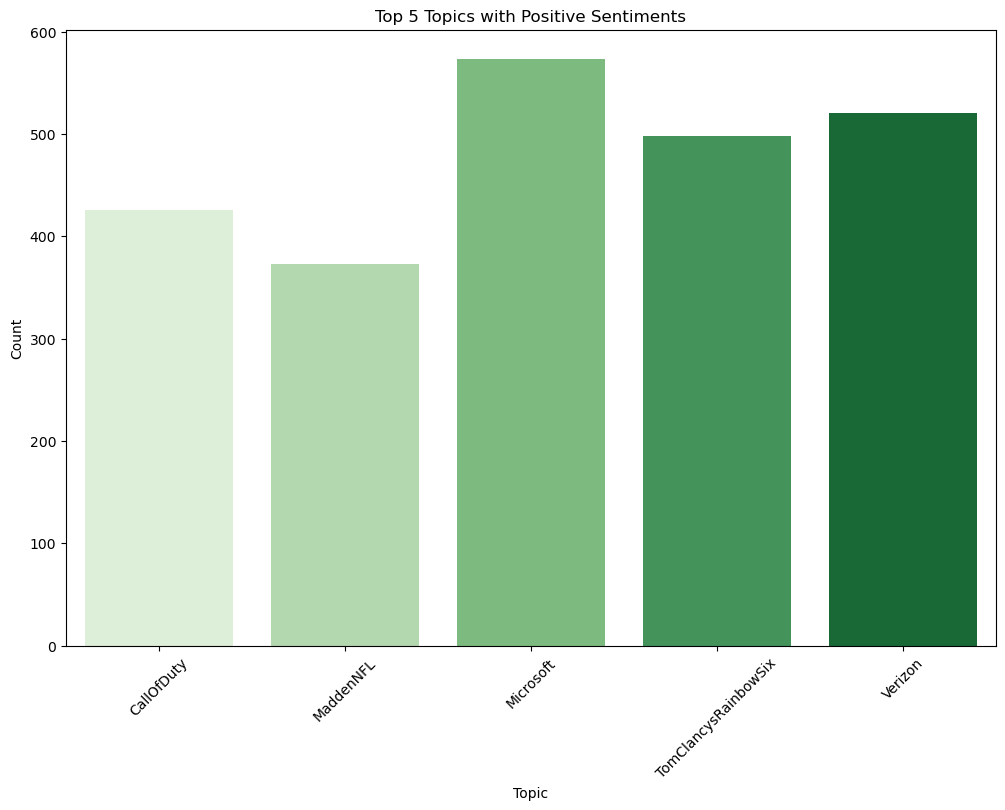

In [25]:
# Visualization for Positive Sentiments
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Positive'], x='Topic', y='Count', palette='Greens')
plt.title('Top 5 Topics with Positive Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

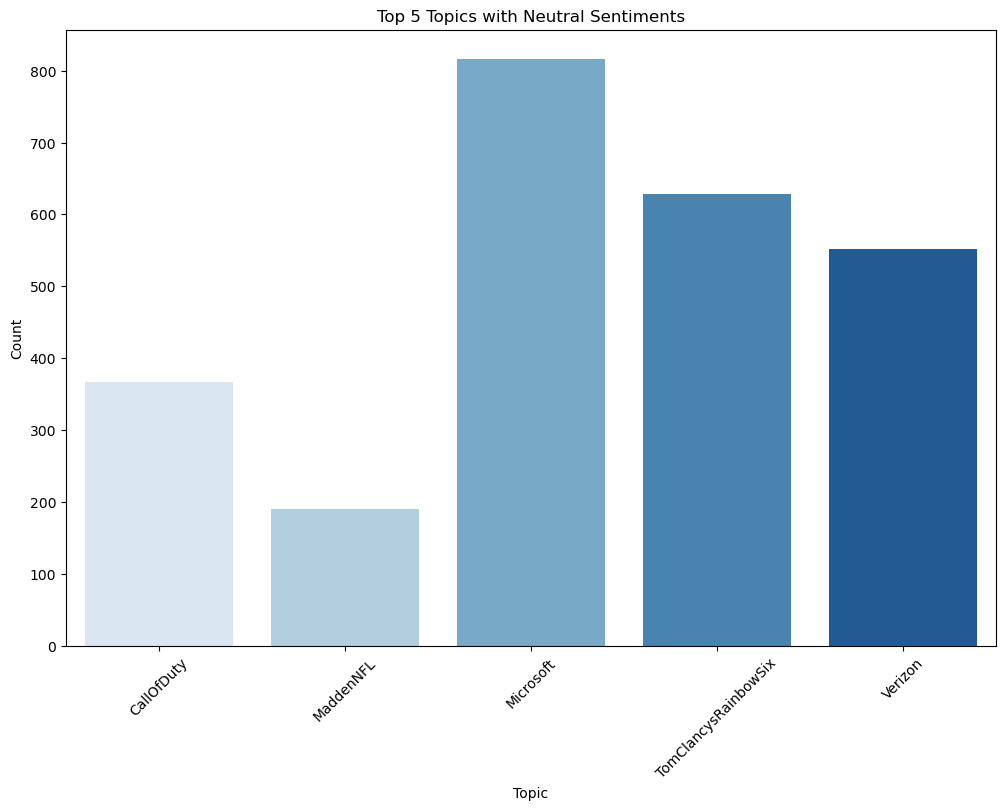

In [26]:
# Visualization for Neutral Sentiments
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Neutral'], x='Topic', y='Count', palette='Blues')
plt.title('Top 5 Topics with Neutral Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

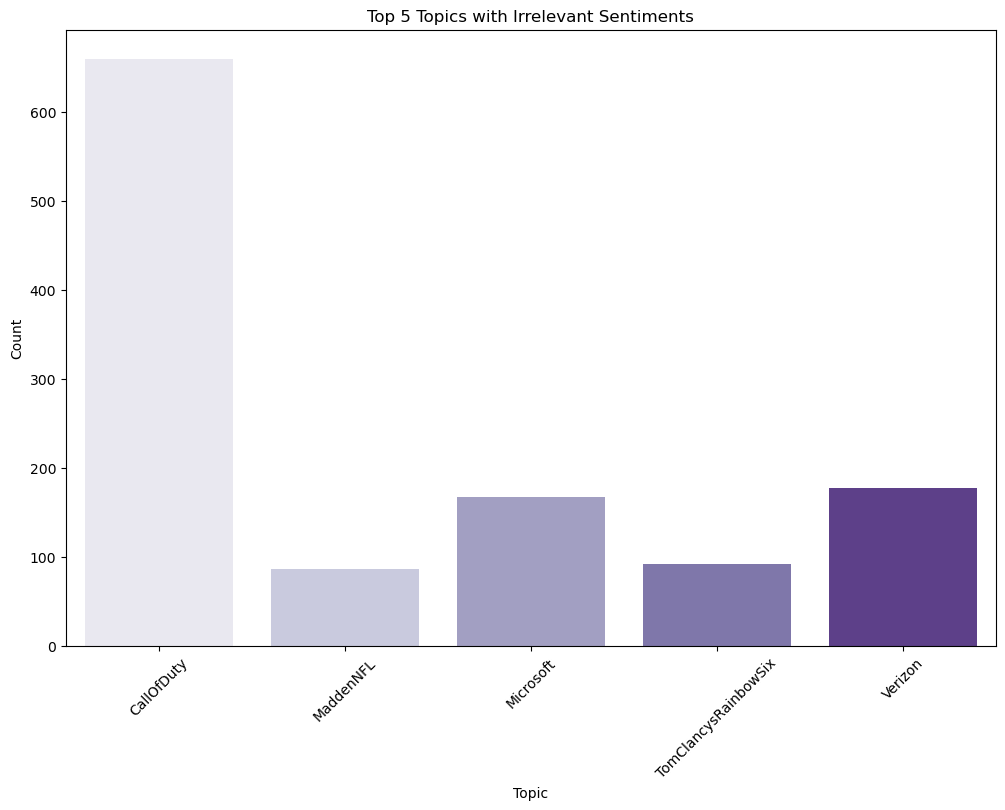

In [27]:
# Visualization for Irrelevant Sentiments
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Irrelevant'], x='Topic', y='Count', palette='Purples')
plt.title('Top 5 Topics with Irrelevant Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### 7. Sentiment Distribution for Specific Topics (Google & Microsoft)

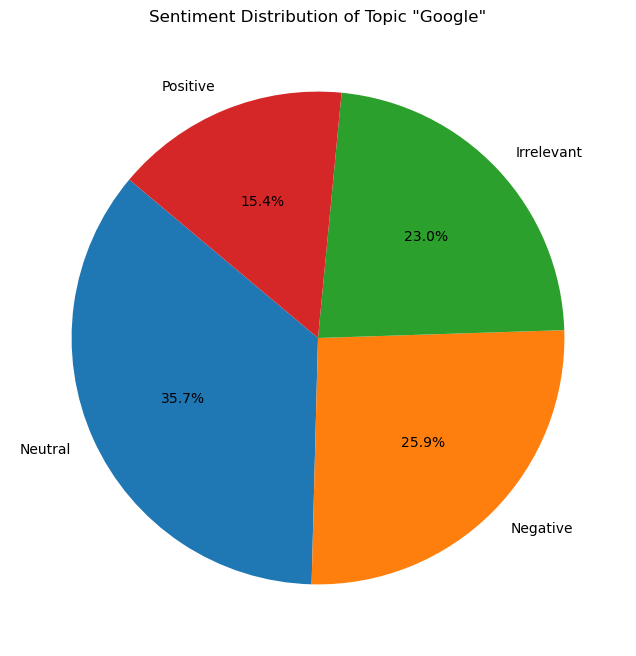

In [29]:
# Sentiment Distribution for 'Google'
google_data = df[df['Topic'] == 'Google']
google_sentiment_counts = google_data['Sentiment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(google_sentiment_counts, labels=google_sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Google"')
plt.show()

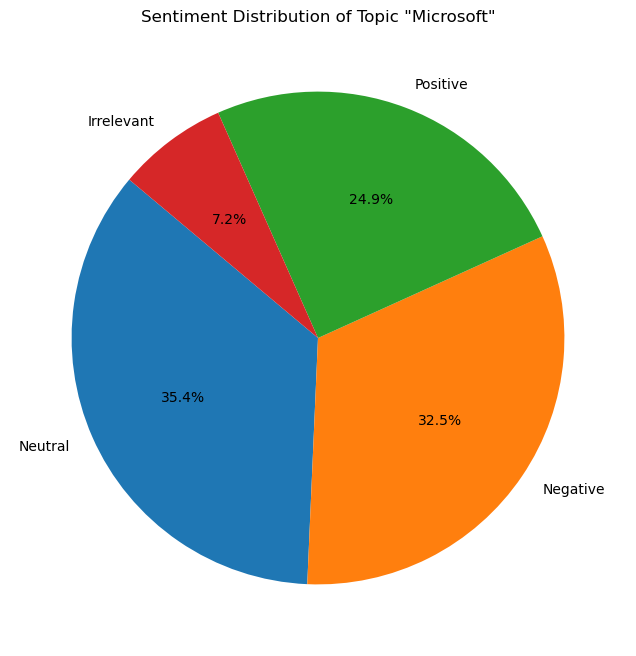

In [30]:
# Sentiment Distribution for 'Microsoft'
ms_data = df[df['Topic'] == 'Microsoft']
ms_sentiment_counts = ms_data['Sentiment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(ms_sentiment_counts, labels=ms_sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Microsoft"')
plt.show()

### 8. Message Length Analysis

In [31]:
# Add a new column for message length
df['msg_len'] = df['Text'].apply(len)

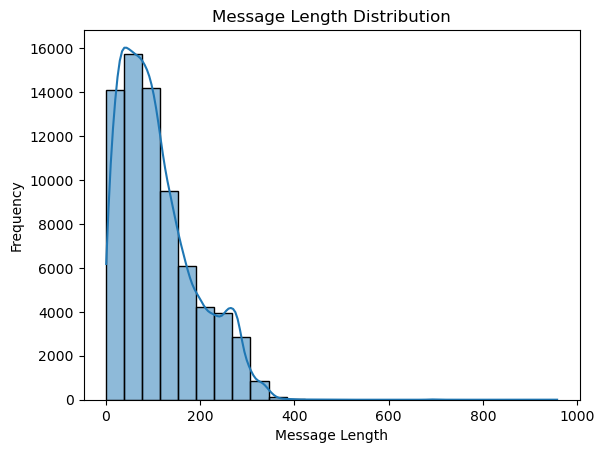

In [32]:
# Visualize the distribution of message length
sns.histplot(df['msg_len'], bins=25, kde=True)
plt.title('Message Length Distribution')
plt.ylabel('Frequency')
plt.xlabel('Message Length')
plt.show()

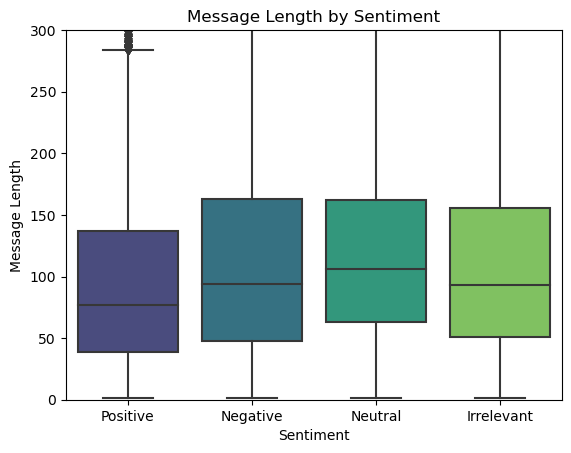

In [33]:
# Boxplot of message length by sentiment
sns.boxplot(data=df, x='Sentiment', y='msg_len', palette='viridis', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])
plt.title('Message Length by Sentiment')
plt.ylabel('Message Length')
plt.xlabel('Sentiment')
plt.ylim(0, 300)
plt.show()

### 9. Heatmap of Topic vs Sentiment

In [34]:
# Create a crosstab for Topic and Sentiment
crosstab = pd.crosstab(index=df['Topic'], columns=df['Sentiment'])

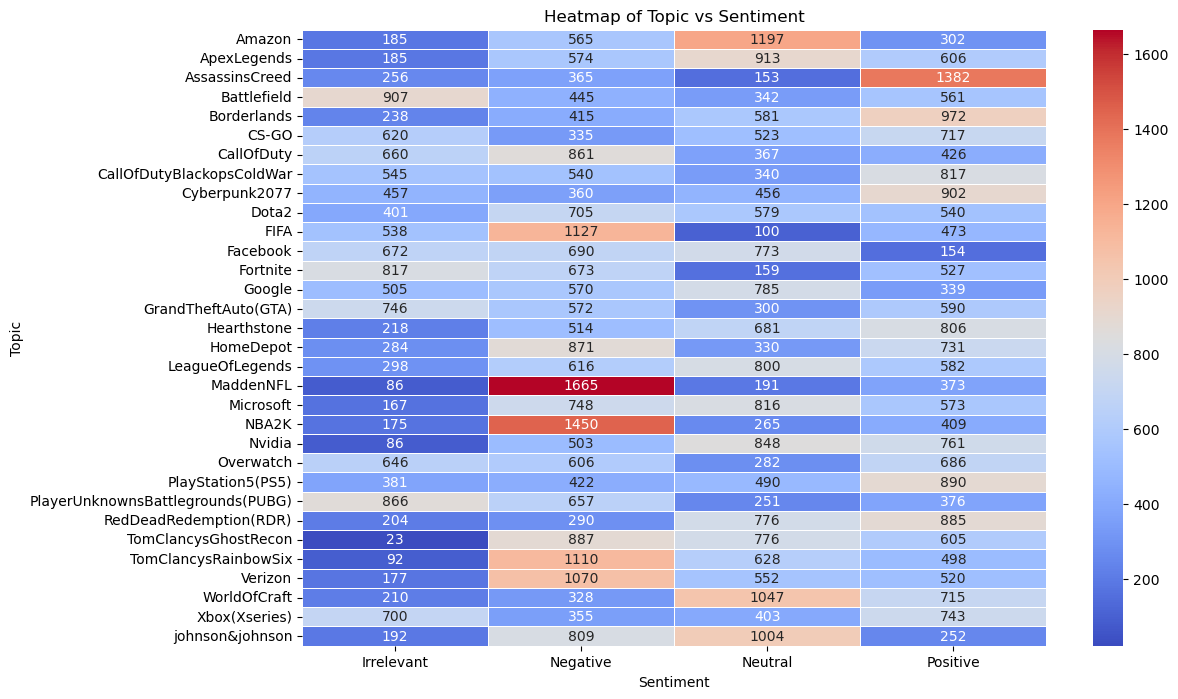

In [35]:
# Heatmap of the crosstab
plt.figure(figsize=(12, 8))  
sns.heatmap(crosstab, cmap='coolwarm', annot=True, fmt='d', linewidths=.5)
plt.title('Heatmap of Topic vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Topic')
plt.show()

### 10. Word Cloud Generation

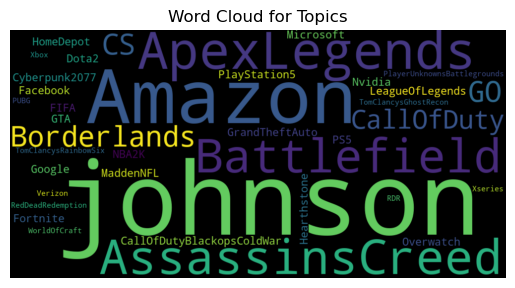

In [36]:
# Generate word cloud for topics
topic_list = ' '.join(crosstab.index)
wc = WordCloud(width=1000, height=500).generate(topic_list)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Topics')
plt.show()

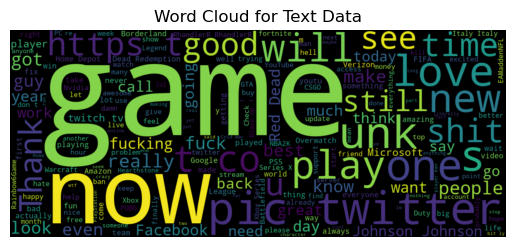

In [38]:
# Generate word cloud for corpus (all text)
corpus = ' '.join(df['Text'])
wc2 = WordCloud(width=1200, height=500).generate(corpus)
plt.imshow(wc2, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Text Data')
plt.show()

### 11. Top 10 Most Frequent Topics

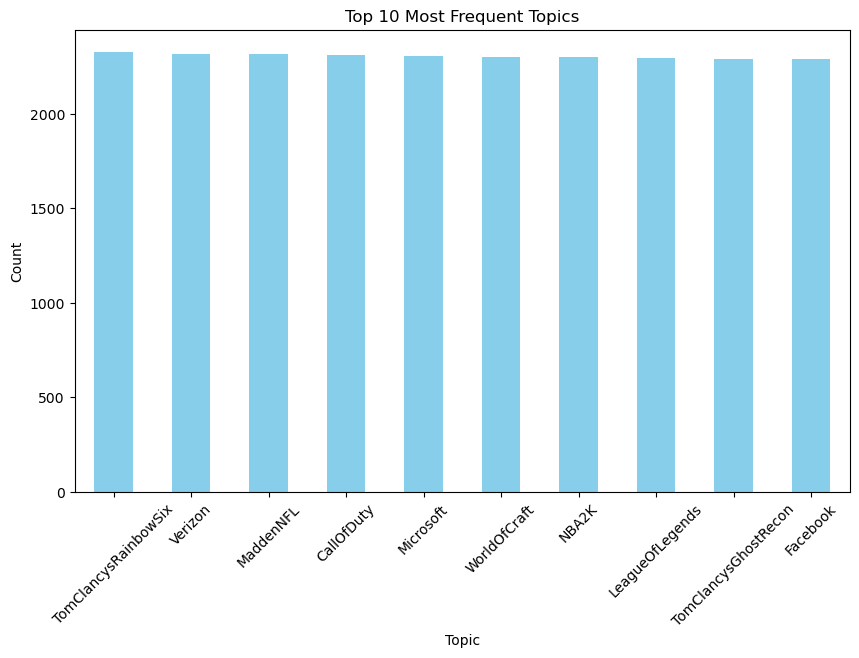

In [39]:
# Top 10 most frequent topics
top_topics = df['Topic'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_topics.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Topics')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


### 12. Sentiment Count by Topic

<Figure size 1200x800 with 0 Axes>

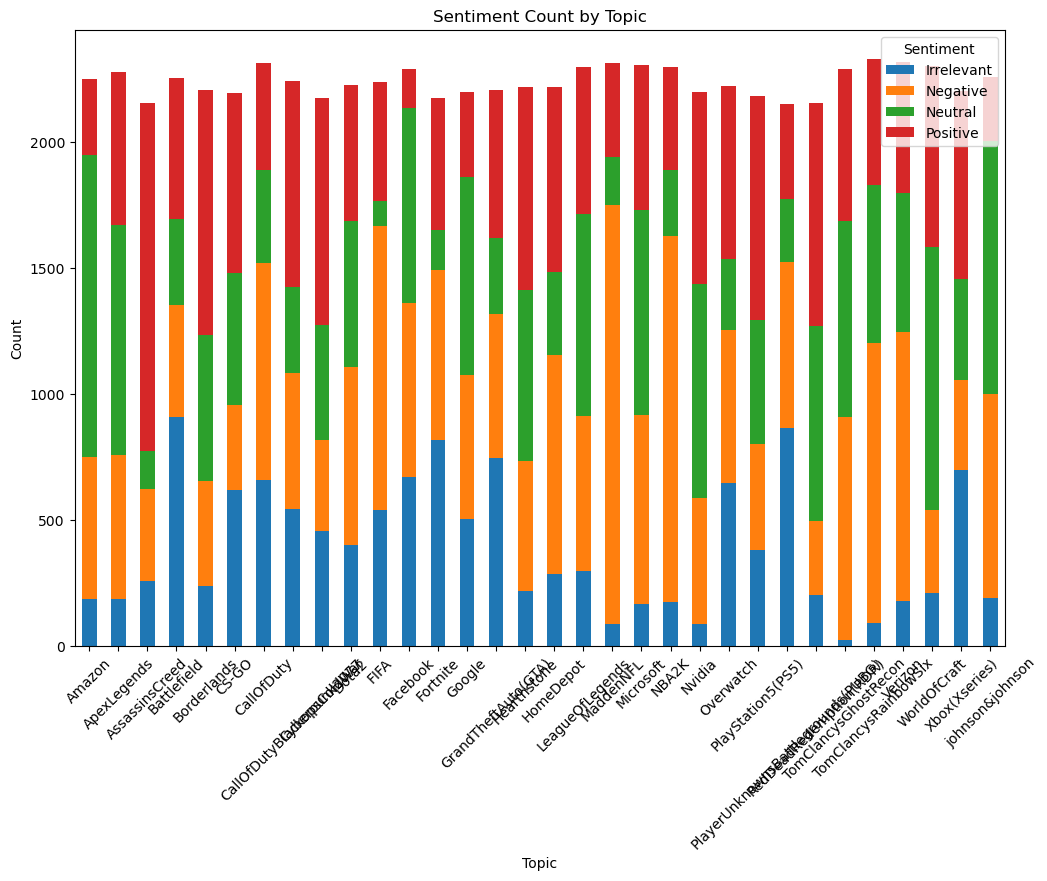

In [40]:
# Count of sentiments by topic
sentiment_by_topic = df.groupby(['Topic', 'Sentiment']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sentiment_by_topic.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Sentiment Count by Topic')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment', loc='upper right')
plt.show()


## Insights from Twitter Sentiment Analysis

The Twitter sentiment analysis revealed several key insights:

- **Most Frequent Topic**: "TomClancyRainbowSix" had the highest engagement.
- **Sentiment Distribution**: Negative sentiment was the most prevalent at 30.3%, followed by positive at 27.5% and neutral at 24.7%. Irrelevant sentiments accounted for 17.5%.
- **Specific Topics**: Discussions about "Google" and "Microsoft" were mostly neutral, indicating balanced opinions.
- **Message Length**: The majority of tweets were concise, typically under 400 characters.

In summary, while negative sentiment dominated, a variety of opinions were expressed across different topics.



Name- Aman Choudhary

Email address- amanchoudhary11189.ac@gmail.com

linkedin Profile- https://www.linkedin.com/in/aman-choudhary-61a9361a0/

Portfolio- https://amanchoudhary1997.github.io/amanchoudhary.github.io/